Number of nodes: 50539
Number of edges: 87438


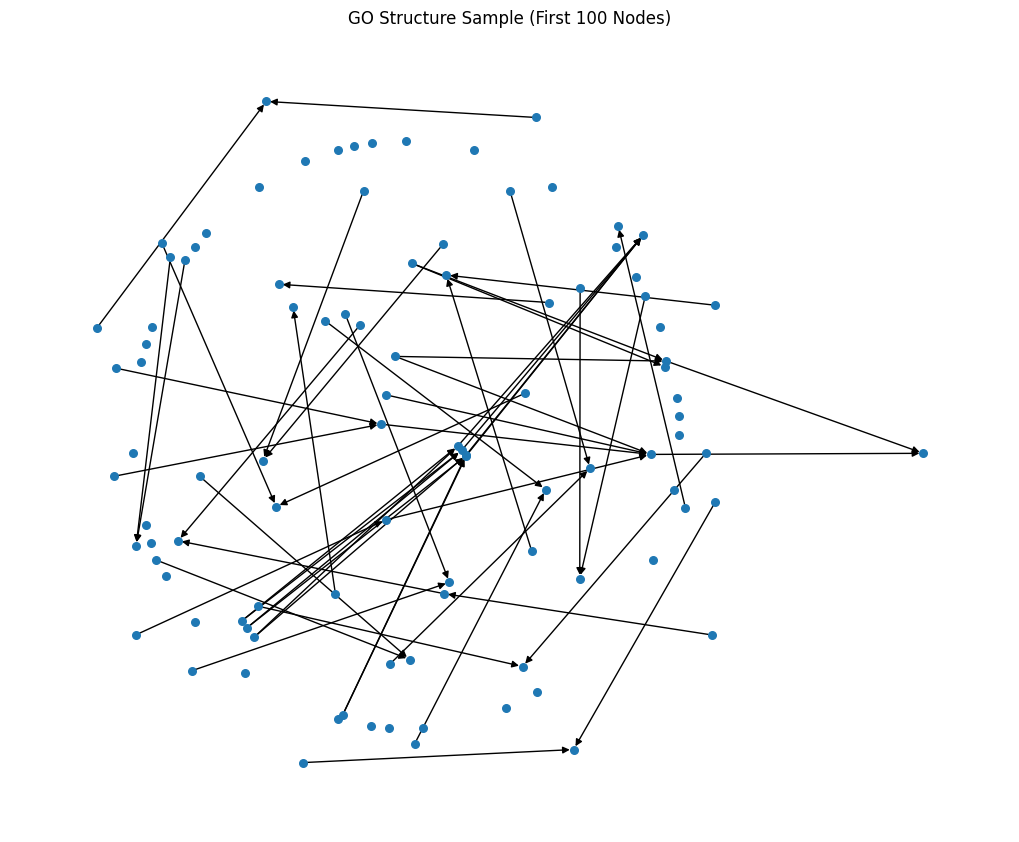

In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt

with open("go-basic.json") as f:
    go_data = json.load(f)

G = nx.DiGraph()

# Add nodes
for node in go_data['graphs'][0]['nodes']:
    G.add_node(node['id'], name=node.get('lbl', ''))

# Add edges (semantic relations)
for edge in go_data['graphs'][0]['edges']:
    src = edge['sub']
    dst = edge['obj']
    G.add_edge(src, dst, relation=edge.get('pred', ''))

print("Number of nodes:", len(G.nodes))
print("Number of edges:", len(G.edges))

subG = G.subgraph(list(G.nodes)[:100])
plt.figure(figsize=(10, 8))
nx.draw_kamada_kawai(subG, node_size=30, with_labels=False)
plt.title("GO Structure Sample (First 100 Nodes)")
plt.show()


In [2]:
# Find leaves (atoms)
leaves = [n for n in G.nodes if G.out_degree(n) == 0]
print("Number of leaves:", len(leaves))
print("Sample leaves:", leaves[:5])

# Build parent → children structure using DFS
parent_to_children = {}
visited = set()

def dfs_build_tree(node):
    if node in visited:
        return
    visited.add(node)
    children = list(G.successors(node))
    parent_to_children[node] = children
    for child in children:
        dfs_build_tree(child)

roots = [n for n in G.nodes if G.in_degree(n) == 0]
print("Number of roots:", len(roots))

for r in roots:
    dfs_build_tree(r)

print("Sample parent → children structure:")
for i, (p, chs) in enumerate(parent_to_children.items()):
    print(f"{i+1}. {p} → {chs}")
    if i == 4:
        break


Number of leaves: 6455
Sample leaves: ['http://purl.obolibrary.org/obo/GO_0099516', 'http://purl.obolibrary.org/obo/GO_1905924', 'http://purl.obolibrary.org/obo/GO_1905925', 'http://purl.obolibrary.org/obo/GO_1905926', 'http://purl.obolibrary.org/obo/GO_1905927']
Number of roots: 30503
Sample parent → children structure:
1. http://purl.obolibrary.org/obo/GO_0099593 → ['http://purl.obolibrary.org/obo/GO_0016189', 'http://purl.obolibrary.org/obo/GO_0036466']
2. http://purl.obolibrary.org/obo/GO_0016189 → ['http://purl.obolibrary.org/obo/GO_0048284', 'http://purl.obolibrary.org/obo/GO_0099532']
3. http://purl.obolibrary.org/obo/GO_0048284 → ['http://purl.obolibrary.org/obo/GO_0006996']
4. http://purl.obolibrary.org/obo/GO_0006996 → ['http://purl.obolibrary.org/obo/GO_0016043']
5. http://purl.obolibrary.org/obo/GO_0016043 → ['http://purl.obolibrary.org/obo/GO_0071840']


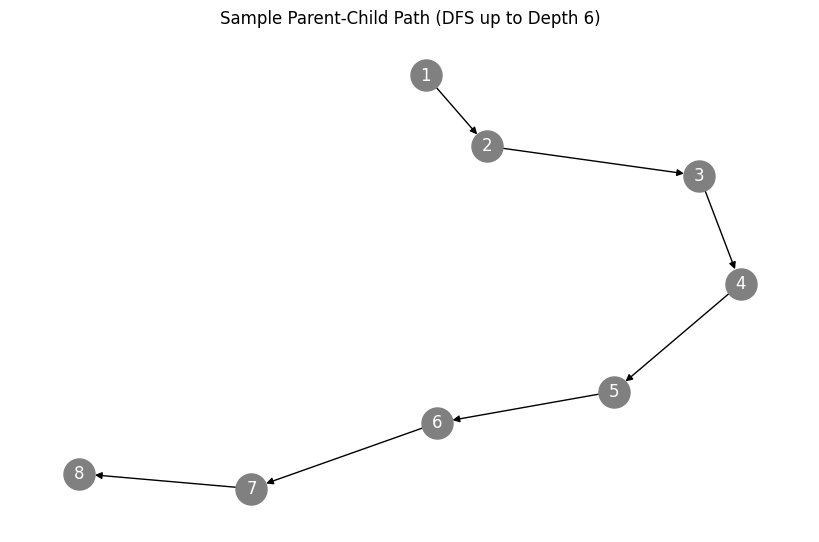

In [3]:
import matplotlib.pyplot as plt

# Select a simple DFS path from a root
sample_path = []

def dfs_sample_path(node, depth=0, max_depth=20):
    if depth > max_depth:
        return
    sample_path.append(node)
    children = parent_to_children.get(node, [])
    if children:
        dfs_sample_path(children[0], depth + 1, max_depth)

# Run sample DFS on one of the roots
sample_path.clear()
dfs_sample_path(roots[0])

# Build graph for the path
G_path = nx.DiGraph()
for i in range(len(sample_path) - 1):
    G_path.add_edge(sample_path[i], sample_path[i+1])

# Draw the path graph
plt.figure(figsize=(8, 5))
pos = nx.spring_layout(G_path, seed=42)
nx.draw(G_path, pos, with_labels=False, node_color='gray', node_size=500, arrows=True)
nx.draw_networkx_labels(G_path, pos, labels={n: str(i+1) for i, n in enumerate(G_path.nodes())}, font_color='white')
plt.title("Sample Parent-Child Path (DFS up to Depth 6)")
plt.show()


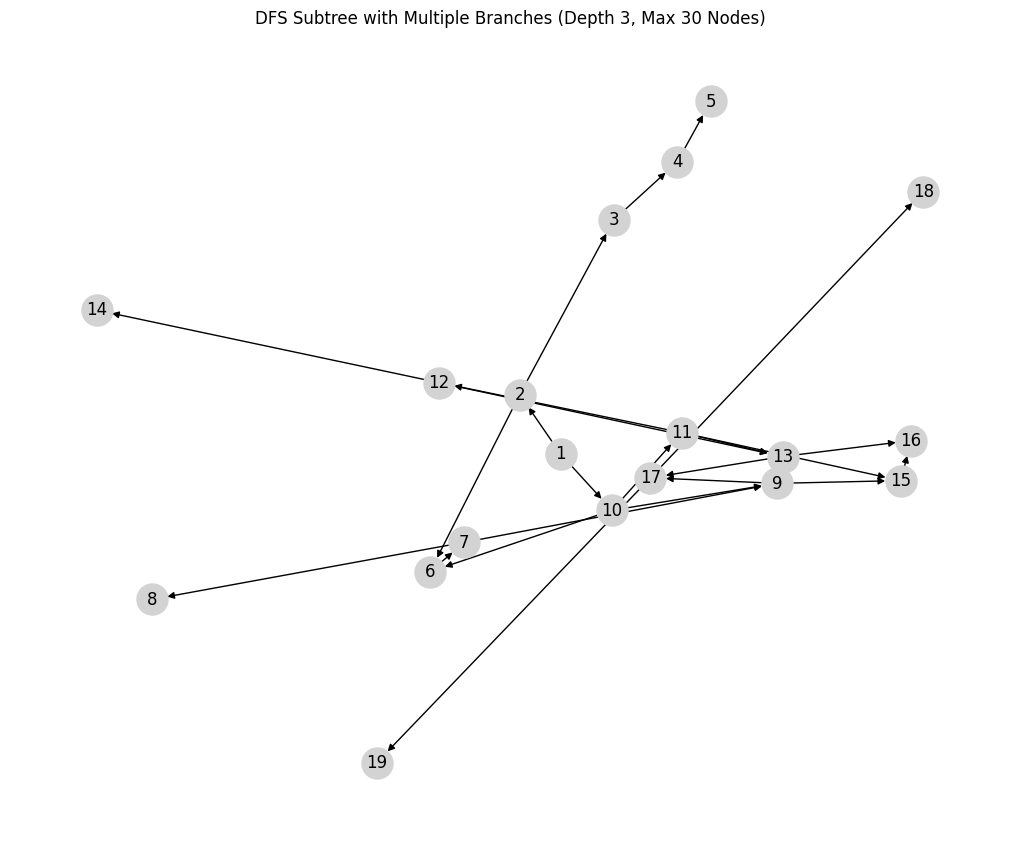

In [4]:
# Build limited DFS subtree graph for visualization
G_subtree = nx.DiGraph()
visited = set()

def dfs_subtree(node, depth=0, max_depth=3, max_nodes=30):
    if node in visited or len(G_subtree.nodes) >= max_nodes:
        return
    visited.add(node)
    children = parent_to_children.get(node, [])
    for child in children:
        G_subtree.add_edge(node, child)
        if depth + 1 <= max_depth:
            dfs_subtree(child, depth + 1, max_depth, max_nodes)

# Run DFS from one of the roots
dfs_subtree(roots[0], max_depth=3, max_nodes=30)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_subtree, seed=42)
nx.draw(G_subtree, pos, with_labels=False, node_color="lightgray", node_size=500)
nx.draw_networkx_labels(G_subtree, pos, labels={n: str(i+1) for i, n in enumerate(G_subtree.nodes)}, font_color="black")
plt.title("DFS Subtree with Multiple Branches (Depth 3, Max 30 Nodes)")
plt.show()


# Assign colors only to leaves


In [5]:
import random

# Number of colors (adjustable)
r = 5

# Node → Color mapping
color_map = {}

# Assign colors only to leaves
for leaf in leaves:
    color_map[leaf] = random.randint(1, r)

# Show sample color assignments
print("Sample leaf color assignments:")
for i, (node, col) in enumerate(color_map.items()):
    print(f"{i+1}. {node} → Color {col}")
    if i == 9:
        break


Sample leaf color assignments:
1. http://purl.obolibrary.org/obo/GO_0099516 → Color 2
2. http://purl.obolibrary.org/obo/GO_1905924 → Color 2
3. http://purl.obolibrary.org/obo/GO_1905925 → Color 3
4. http://purl.obolibrary.org/obo/GO_1905926 → Color 2
5. http://purl.obolibrary.org/obo/GO_1905927 → Color 3
6. http://purl.obolibrary.org/obo/GO_1905928 → Color 1
7. http://purl.obolibrary.org/obo/GO_1905929 → Color 1
8. http://purl.obolibrary.org/obo/GO_0051526 → Color 3
9. http://purl.obolibrary.org/obo/GO_0051527 → Color 3
10. http://purl.obolibrary.org/obo/GO_0051528 → Color 5


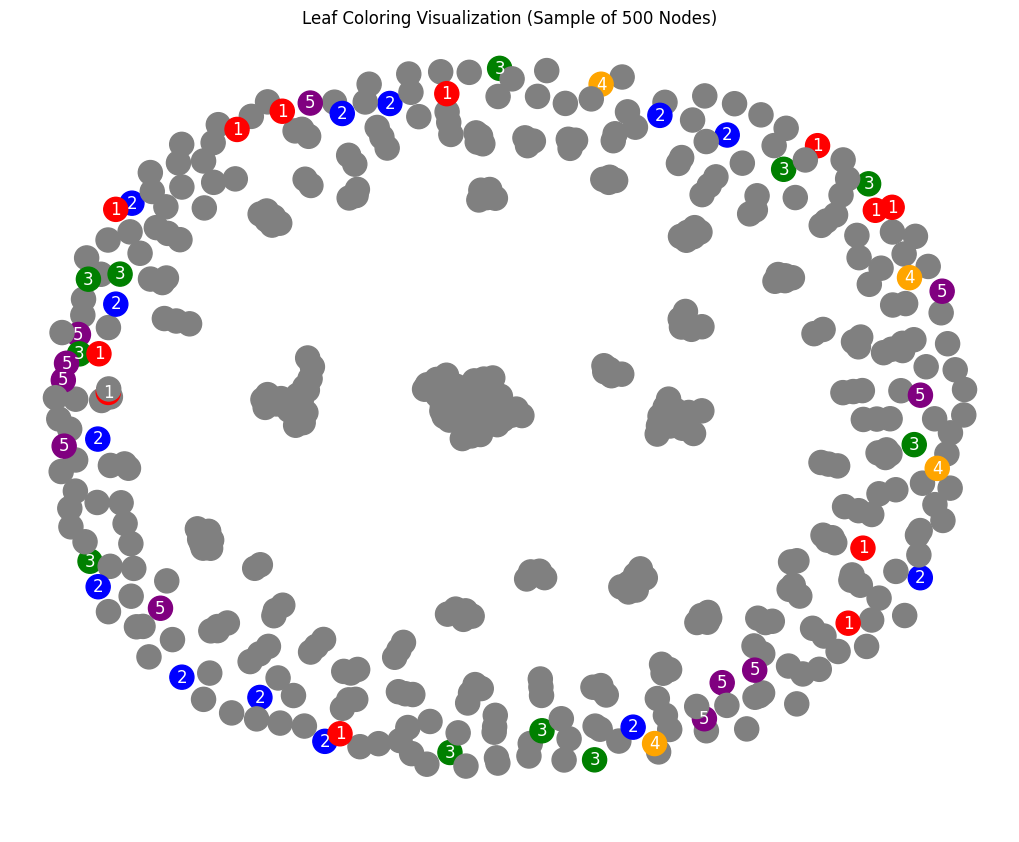

In [6]:
# Select a subgraph with the first 500 nodes for visualization
sample_nodes = list(G.nodes)[:500]
subG = G.subgraph(sample_nodes).copy()
subG = subG.to_undirected()

# Assign colors to nodes based on color_map (if available)
node_colors = [color_map.get(n, 0) for n in subG.nodes()]

color_palette = {
    0: "gray",     # Uncolored nodes
    1: "red",
    2: "blue",
    3: "green",
    4: "orange",
    5: "purple"
}
color_list = [color_palette.get(c, "black") for c in node_colors]

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(subG, seed=42)
nx.draw(subG, pos, with_labels=False, node_color=color_list, node_size=300)
nx.draw_networkx_labels(subG, pos, labels={n: str(color_map.get(n, '')) for n in subG.nodes()}, font_color='white')
plt.title("Leaf Coloring Visualization (Sample of 500 Nodes)")
plt.show()


Recursive function to propagate colors from leaves upwards


In [7]:
from collections import Counter

# Recursive function to propagate colors from leaves upwards
def assign_color_from_children(node):
    if node in color_map:
        return color_map[node]  # Already colored

    children = parent_to_children.get(node, [])
    if not children:
        color_map[node] = 0  # No children, no color
        return 0

    # Recursively color children
    child_colors = [assign_color_from_children(ch) for ch in children]
    valid_colors = [c for c in child_colors if c > 0]

    if valid_colors:
        dominant_color = Counter(valid_colors).most_common(1)[0][0]
        color_map[node] = dominant_color
        return dominant_color
    else:
        color_map[node] = 0
        return 0

# Apply the algorithm to all roots
for root in roots:
    assign_color_from_children(root)

# Show sample color assignments for non-leaf nodes
print("Sample color assignments for internal nodes:")
non_leaves = [n for n in color_map if n not in leaves]
for i, node in enumerate(non_leaves):
    print(f"{i+1}. {node} → Color {color_map[node]}")
    if i == 9:
        break


Sample color assignments for internal nodes:
1. http://purl.obolibrary.org/obo/GO_0009987 → Color 4
2. http://purl.obolibrary.org/obo/GO_0071840 → Color 4
3. http://purl.obolibrary.org/obo/GO_0016043 → Color 4
4. http://purl.obolibrary.org/obo/GO_0006996 → Color 4
5. http://purl.obolibrary.org/obo/GO_0048284 → Color 4
6. http://purl.obolibrary.org/obo/GO_0051179 → Color 4
7. http://purl.obolibrary.org/obo/GO_0051234 → Color 4
8. http://purl.obolibrary.org/obo/GO_0006810 → Color 4
9. http://purl.obolibrary.org/obo/GO_0016192 → Color 4
10. http://purl.obolibrary.org/obo/GO_0051641 → Color 4


In [8]:
from collections import Counter

leaf_colors = [color_map.get(leaf, 0) for leaf in leaves]
color_counts = Counter(leaf_colors)

print("Leaf color distribution:")
for c, count in color_counts.items():
    print(f"Color {c}: {count} leaves")


Leaf color distribution:
Color 2: 1232 leaves
Color 3: 1299 leaves
Color 1: 1268 leaves
Color 5: 1330 leaves
Color 4: 1326 leaves


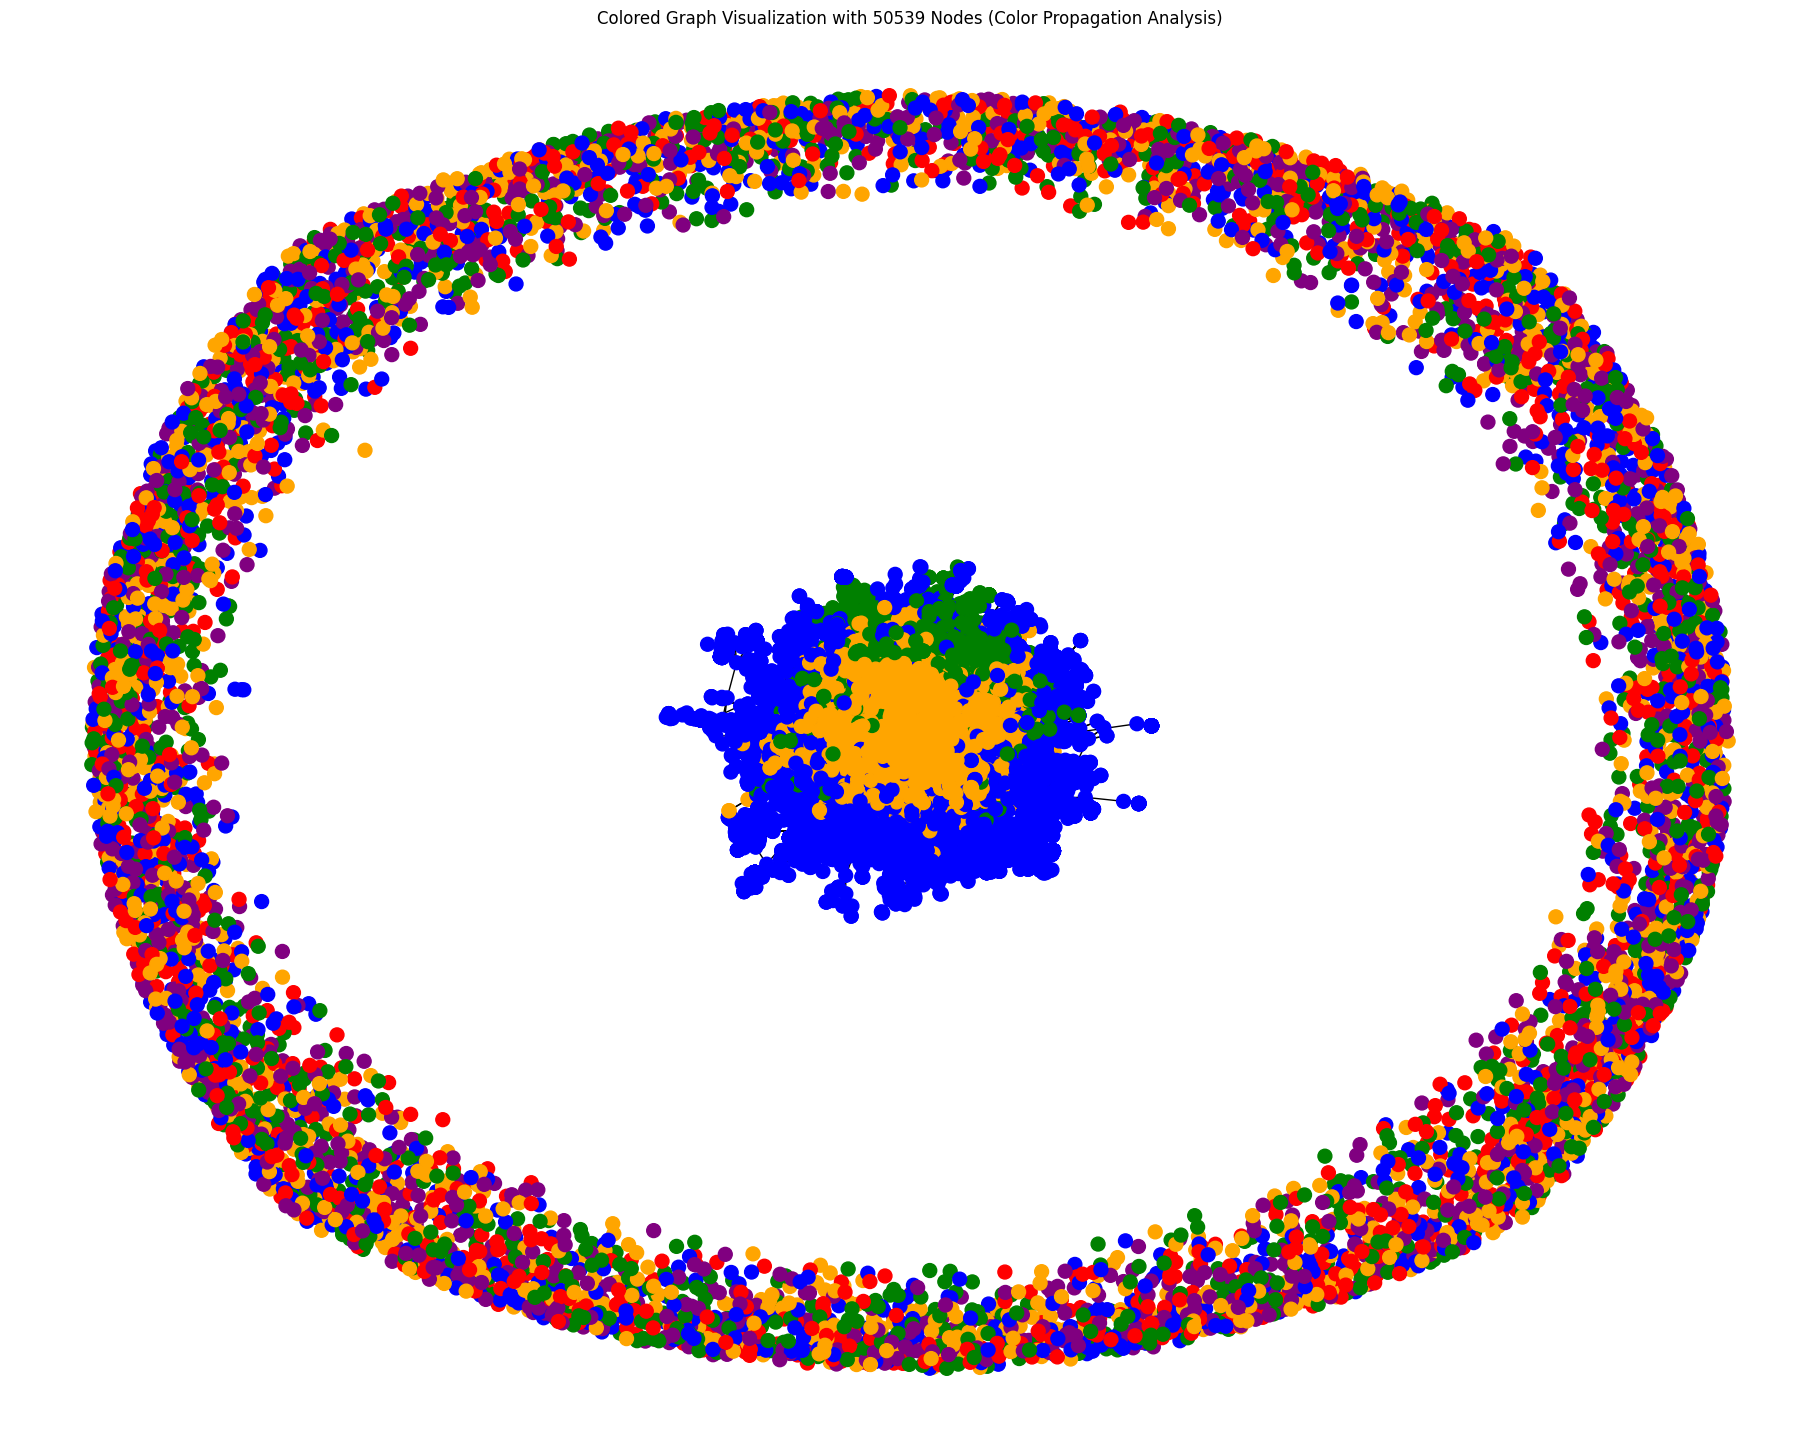

In [9]:
# Select the first 50539nodes for visualization
sample_nodes_large = list(G.nodes)[:50539]
subG_2000 = G.subgraph(sample_nodes_large).copy()
subG_2000 = subG_2000.to_undirected()

node_colors = [color_map.get(n, 0) for n in subG_2000.nodes()]
color_palette = {
    0: "gray",
    1: "red",
    2: "blue",
    3: "green",
    4: "orange",
    5: "purple"
}
color_list = [color_palette.get(c, "black") for c in node_colors]

plt.figure(figsize=(18, 14))
pos = nx.spring_layout(subG_2000, seed=42)
nx.draw(subG_2000, pos, with_labels=False, node_color=color_list, node_size=100)
plt.title("Colored Graph Visualization with 50539 Nodes (Color Propagation Analysis)")
plt.show()


In [10]:
from collections import defaultdict

def find_monochrome_communities(G, color_map):
    communities = []
    visited = set()

    for node in G.nodes:
        if node in visited:
            continue
        color = color_map.get(node, None)
        if color is None:
            continue

        # BFS or DFS to find same-color community
        stack = [node]
        community = set()
        while stack:
            current = stack.pop()
            if current in visited or color_map.get(current) != color:
                continue
            visited.add(current)
            community.add(current)
            stack.extend([nbr for nbr in G.neighbors(current) if nbr not in visited])

        if len(community) > 1:  # Only consider real communities (more than 1 node)
            communities.append((color, community))

    return communities

monochrome_communities = find_monochrome_communities(G.to_undirected(), color_map)

# Summary statistics
print("Number of connected monochrome communities:", len(monochrome_communities))
sizes_by_color = defaultdict(list)
for color, comm in monochrome_communities:
    sizes_by_color[color].append(len(comm))

for c, sizes in sizes_by_color.items():
    print(f"Color {c}: {len(sizes)} communities | Largest: {max(sizes)} | Average size: {sum(sizes)/len(sizes):.2f}")


Number of connected monochrome communities: 4
Color 4: 1 communities | Largest: 28748 | Average size: 28748.00
Color 2: 2 communities | Largest: 11153 | Average size: 5578.00
Color 3: 1 communities | Largest: 4184 | Average size: 4184.00


In [18]:
from collections import Counter

# Get colors of all nodes in the graph
all_colors = [color_map.get(n, 0) for n in G.nodes()]
color_counts = Counter(all_colors)

print("Color distribution in the entire graph:")
for c in sorted(color_counts):
    print(f"Color {c}: {color_counts[c]} nodes")


Color distribution in the entire graph:
Color 1: 1268 nodes
Color 2: 12386 nodes
Color 3: 5482 nodes
Color 4: 30073 nodes
Color 5: 1330 nodes


Louvain

In [19]:
import community  
import networkx as nx
from collections import defaultdict

# Run Louvain on the undirected graph
G_undirected = G.to_undirected()
partition = community.best_partition(G_undirected)

# Build communities from Louvain output
louvain_communities = defaultdict(set)
for node, comm_id in partition.items():
    louvain_communities[comm_id].add(node)

print("Number of Louvain communities:", len(louvain_communities))
sizes = [len(c) for c in louvain_communities.values()]
print(f"Largest community size: {max(sizes)} nodes")
print(f"Average community size: {sum(sizes)/len(sizes):.2f}")


Number of Louvain communities: 6529
Largest community size: 4546 nodes
Average community size: 7.74


In [20]:
import math

def structural_entropy(communities_dict):
    sizes = [len(c) for c in communities_dict.values() if len(c) > 0]
    total = sum(sizes)
    probs = [size / total for size in sizes]
    entropy = -sum(p * math.log2(p) for p in probs if p > 0)
    return entropy

# Compute structural entropy for Louvain communities
H_struct = structural_entropy(louvain_communities)
print(f" Louvain Structural Entropy: {H_struct:.4f}")


 Louvain Structural Entropy: 6.7188


In [22]:
our_colored_nodes = set()
for color, nodes in monochrome_communities:
    our_colored_nodes.update(nodes)

In [23]:
unassigned_nodes = G.nodes - our_colored_nodes
print(f"Nodes not assigned to any community in our method: {len(unassigned_nodes)}")


Nodes not assigned to any community in our method: 6451


In [24]:
# Start with the main communities from our method
full_our_communities = {
    i: nodes for i, (color, nodes) in enumerate(monochrome_communities)
}

# Start numbering for singleton communities
start_id = len(full_our_communities)

# Add each unassigned node as its own community
for i, n in enumerate(unassigned_nodes):
    full_our_communities[start_id + i] = [n]


In [25]:
H_struct_all = structural_entropy(full_our_communities)
print(f"Structural Entropy (Our Method with Singleton Communities): {H_struct_all:.4f}")


Structural Entropy (Our Method with Singleton Communities): 3.2369


In [27]:
import math

def Hcore(r, n, d):
    if r == 0 or n == 0:
        return 0
    p = (math.comb(n, d) * (1 / r) ** d * (1 - 1 / r) ** (n - d))
    if p == 0 or p == 1:
        return 0
    return -p * math.log2(1 - p)

def H_louvain_total(louvain_communities, color_map, r=5):
    total_entropy = 0
    mono_count = 0
    for nodes in louvain_communities.values():
        if len(nodes) < 2:
            continue
        colors = [color_map.get(n, 0) for n in nodes]
        dominant_color, dominant_count = Counter(colors).most_common(1)[0]
        if dominant_count == len(nodes):
            mono_count += 1
        total_entropy += Hcore(r, len(nodes), dominant_count)
    return total_entropy, mono_count

In [28]:
our_real_communities = {
    i: nodes for i, (color, nodes) in enumerate(monochrome_communities)
}

H_struct_ours = structural_entropy(our_real_communities)

H_color_ours, mono_count_ours = H_louvain_total(our_real_communities, color_map, r=5)

In [29]:
# Select the largest community with a specific color
selected_color = 4
target_community = None

for color, nodes in monochrome_communities:
    if color == selected_color and (target_community is None or len(nodes) > len(target_community)):
        target_community = nodes

print(f"Size of the community with color {selected_color}: {len(target_community)} nodes")
print("Sample nodes from the selected community:")
for i, node in enumerate(list(target_community)[:10]):
    print(f"{i+1}. {node}")


Size of the community with color 4: 28748 nodes
Sample nodes from the selected community:
1. http://purl.obolibrary.org/obo/GO_0044256
2. http://purl.obolibrary.org/obo/GO_0002123
3. http://purl.obolibrary.org/obo/GO_0090268
4. http://purl.obolibrary.org/obo/GO_2000770
5. http://purl.obolibrary.org/obo/GO_1901497
6. http://purl.obolibrary.org/obo/GO_0018310
7. http://purl.obolibrary.org/obo/GO_0060052
8. http://purl.obolibrary.org/obo/GO_0002624
9. http://purl.obolibrary.org/obo/GO_1905517
10. http://purl.obolibrary.org/obo/GO_2000421


In [30]:
import json

with open("go-basic.json", "r", encoding="utf-8") as f:
    go_data = json.load(f)
go_id_to_label = {}
for term in go_data["graphs"][0]["nodes"]:
    if "id" in term and "lbl" in term:
        go_id_to_label[term["id"]] = term["lbl"]

def get_label(uri):
    go_id = uri.split("/")[-1].replace("_", ":")
    return go_id_to_label.get(go_id, "؟ Unknown")

In [31]:
for node in go_data["graphs"][0]["nodes"][:5]:
    print(json.dumps(node, indent=2))


{
  "id": "http://purl.obolibrary.org/obo/GO_0099593",
  "meta": {
    "definition": {
      "val": "Fusion of an endocytosed synaptic vesicle with an endosome.",
      "xrefs": [
        "GOC:dos"
      ]
    },
    "basicPropertyValues": [
      {
        "pred": "http://www.geneontology.org/formats/oboInOwl#hasOBONamespace",
        "val": "biological_process"
      }
    ]
  },
  "type": "CLASS",
  "lbl": "endocytosed synaptic vesicle to endosome fusion"
}
{
  "id": "http://purl.obolibrary.org/obo/GO_0099592",
  "meta": {
    "definition": {
      "val": "The process in which endocytosed synaptic vesicles fuse to the presynaptic endosome followed by sorting of synaptic vesicle components and budding of new synaptic vesicles.",
      "xrefs": [
        "GOC:dos"
      ]
    },
    "synonyms": [
      {
        "pred": "hasExactSynonym",
        "val": "synaptic vesicle processing via endosome involved in synaptic vesicle recycling",
        "xrefs": []
      }
    ],
    "basicPrope

In [32]:
# Build dictionary: full URI → label
go_id_to_label = {}
for term in go_data["graphs"][0]["nodes"]:
    if "id" in term and "lbl" in term:
        go_id_to_label[term["id"]] = term["lbl"]

def get_label(uri):
    return go_id_to_label.get(uri, "? Unknown")


In [39]:
# Inspect communities with specific colors
target_colors = [3, 4]

for color, nodes in monochrome_communities:
    if color in target_colors:
        sample_nodes = list(nodes)[:10]
        print(f"\n Community with color {color} | Number of nodes: {len(nodes)}")
        for i, uri in enumerate(sample_nodes):
            label = get_label(uri)
            print(f"{i+1}. {uri} → {label}")




 Community with color 4 | Number of nodes: 28748
1. http://purl.obolibrary.org/obo/GO_0044256 → protein digestion
2. http://purl.obolibrary.org/obo/GO_0002123 → irritable aggressive behavior
3. http://purl.obolibrary.org/obo/GO_0090268 → activation of mitotic cell cycle spindle assembly checkpoint
4. http://purl.obolibrary.org/obo/GO_2000770 → negative regulation of establishment or maintenance of cell polarity regulating cell shape
5. http://purl.obolibrary.org/obo/GO_1901497 → response to diphenyl ether
6. http://purl.obolibrary.org/obo/GO_0018310 → protein-FMN linkage via S-(6-FMN)-L-cysteine
7. http://purl.obolibrary.org/obo/GO_0060052 → neurofilament cytoskeleton organization
8. http://purl.obolibrary.org/obo/GO_0002624 → positive regulation of B cell antigen processing and presentation
9. http://purl.obolibrary.org/obo/GO_1905517 → macrophage migration
10. http://purl.obolibrary.org/obo/GO_2000421 → positive regulation of eosinophil extravasation

 Community with color 3 | Numbe

In [41]:
from collections import defaultdict

communities_by_color = defaultdict(list)
for node, color in color_map.items():
    communities_by_color[color].append(node)

community_color_4_nodes = communities_by_color[4]
community_color_3_nodes = communities_by_color[3]


In [42]:
from collections import Counter
import json

with open("go-basic.json", "r", encoding="utf-8") as f:
    go_data = json.load(f)

go_id_to_namespace = {}
for term in go_data["graphs"][0]["nodes"]:
    if "id" in term:
        for prop in term.get("meta", {}).get("basicPropertyValues", []):
            if prop["pred"].endswith("hasOBONamespace"):
                go_id_to_namespace[term["id"]] = prop["val"]

color_communities = {
    4: community_color_4_nodes,  
    3: community_color_3_nodes  
}

for color, nodes in color_communities.items():
    namespaces = [go_id_to_namespace.get(n, "Unknown") for n in nodes]
    count = Counter(namespaces)
    total = len(namespaces)
    print(f"\n color {color} | node: {total}")
    for ns, c in count.items():
        print(f" - {ns}: {c} ({(c/total)*100:.2f}%)")



 color 4 | node: 30073
 - Unknown: 658 (2.19%)
 - biological_process: 29125 (96.85%)
 - cellular_component: 61 (0.20%)
 - molecular_function: 228 (0.76%)
 - external: 1 (0.00%)

 color 3 | node: 5482
 - biological_process: 352 (6.42%)
 - Unknown: 659 (12.02%)
 - cellular_component: 4237 (77.29%)
 - molecular_function: 233 (4.25%)
 - external: 1 (0.02%)


In [43]:
community_color_1_nodes = communities_by_color[1]
community_color_2_nodes = communities_by_color[2]

def analyze_namespace_distribution(color_label, nodes):
    ns_counter = defaultdict(int)
    for n in nodes:
        ns = go_id_to_namespace.get(n, "Unknown")
        ns_counter[ns] += 1
    total = len(nodes)
    print(f"\ncolor {color_label} | node: {total}")
    for ns, count in sorted(ns_counter.items(), key=lambda x: -x[1]):
        percentage = (count / total) * 100
        print(f" - {ns}: {count} ({percentage:.2f}%)")

analyze_namespace_distribution(1, community_color_1_nodes)
analyze_namespace_distribution(2, community_color_2_nodes)



color 1 | node: 1268
 - Unknown: 647 (51.03%)
 - biological_process: 374 (29.50%)
 - molecular_function: 194 (15.30%)
 - cellular_component: 53 (4.18%)

color 2 | node: 12386
 - molecular_function: 11373 (91.82%)
 - Unknown: 649 (5.24%)
 - biological_process: 308 (2.49%)
 - cellular_component: 53 (0.43%)
 - external: 3 (0.02%)


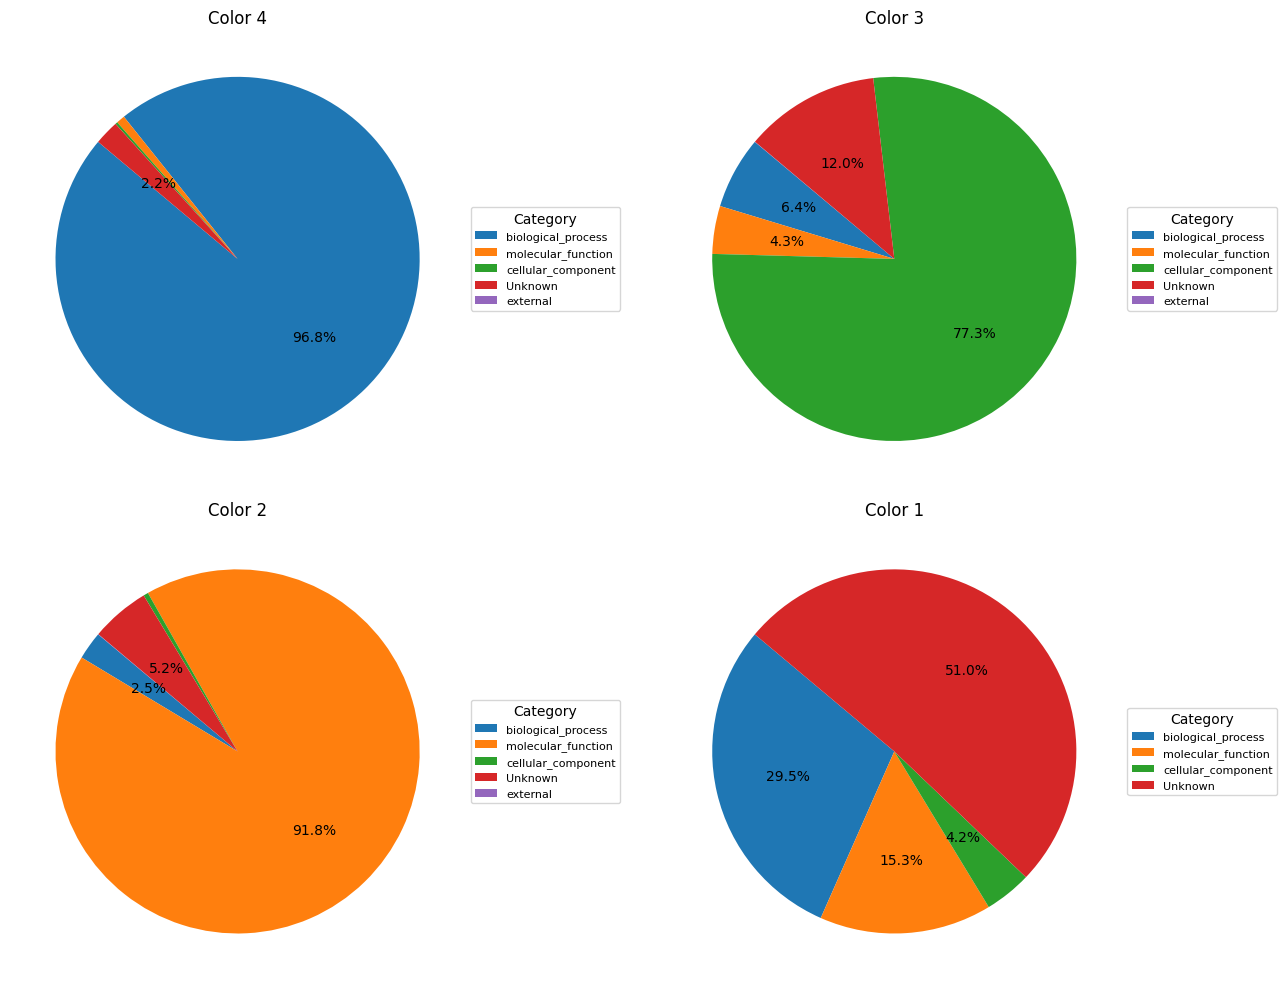

In [2]:
import matplotlib.pyplot as plt

data = {
    "Color 4": {
        "biological_process": 29125,
        "molecular_function": 228,
        "cellular_component": 61,
        "Unknown": 658,
        "external": 1
    },
    "Color 3": {
        "biological_process": 352,
        "molecular_function": 233,
        "cellular_component": 4237,
        "Unknown": 659,
        "external": 1
    },
    "Color 2": {
        "biological_process": 308,
        "molecular_function": 11373,
        "cellular_component": 53,
        "Unknown": 649,
        "external": 3
    },
    "Color 1": {
        "biological_process": 374,
        "molecular_function": 194,
        "cellular_component": 53,
        "Unknown": 647
    }
}

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, (color, categories) in enumerate(data.items()):
    labels = list(categories.keys())
    values = list(categories.values())

    def autopct_func(pct):
        return ('%1.1f%%' % pct) if pct > 2 else ''

    wedges, texts, autotexts = axs[i].pie(
        values,
        startangle=140,
        autopct=autopct_func,
        textprops={'fontsize': 10}
    )
    axs[i].legend(wedges, labels, title="Category", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=8)
    axs[i].set_title(color)

plt.tight_layout()
plt.show()
